In [1]:
import numpy as np
# One of the way to build keras model is by using sequential API. 
# Sequential API allows models to be built layer by layer
# In this problem we have 5 neurons-4 neurons-3 neurons-2 neurons, 
# i.e 4 layers
from keras.models import Sequential

# Since these 4 layers are connected, thus we use Dense class
from keras.layers import Dense

from keras import metrics

import matplotlib.pyplot as plt
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
features_and_targets = np.loadtxt('features_and_targets.csv',delimiter=',')
np.random.shuffle(features_and_targets)

# Features(first 5 variables) and Targets(last two variables) are assigned to X and Y.
X = features_and_targets[:,0:5]
Y = features_and_targets[:,5:7]

In [3]:
# np.random.seed(7) will produce the same set of network weights 
np.random.seed(7)

# building keras model using sequential API
model = Sequential()

# adding 1st hidden layer which has 4 nuerons, input layer has 5 nuerons,
# for 5 variables in 'X' dataset. The inputs is specifically mentioned 
# by using "input_dim" argument.
# activation function "relu" is used.
# The addition of product of inputs and the random weights of all the layers
# below will passed through the respective activation function.
model.add(Dense(4, input_dim=5, activation='relu'))

# adding 2nd hidden layer with 3 nuerons and passing it thtough relu function.
# The "relu" will predict the output from the 2nd hidden layer in 1 or 0. 
model.add(Dense(3, activation='relu'))

# adding 3rd hidden/output layer which has 2 neurons, the activarion
# function used here is "sigmoid" which predicts the targets, ie. "Y"
# by values between 1 and 0
model.add(Dense(2, activation='sigmoid'))

# after adding all the layers to the model, compiling them together with
# additional properties such as loss "SSR" , gradient descent optimizer 
# called "adam". The predicted observations from the sigmoid activation function 
# will be used to compute loss = np.sum( (y_model-y_obs)**2 ) and further 
# the weights will be reduced by optimizer till the loss is low or until
# the specified epochs are completed. Metric allows to monitor the model while 
# training. accuracy value and loss is generated for each epoch in verbose output.
# compiling the model involves Tensorflow at backend using which the weights are
# evaluated and the predictions are made.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# The model created above will be now trained with data using fit() function.
# For every epoch the loss will be decreased to its minimum.
# verbose = 0 turns off the output progress bars during training
one_fifty_history = model.fit(X, Y, epochs=150, verbose=0)

# evaluate() function is used to check how the model will perform
# on the test data set, here we will evaluate with the same dataset passed in
# while training the model.When the score are printed in the output
# it shows the values of overall [loss, accuracy] of the model
scores = model.evaluate(X, Y)
print(scores)

# predict() function is used for predicting the targets of the new dataset if any.
# here we will just predict for the features dataset we have and check its accuracy
# in the output below
predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

22/22 [==============================] - 0s 784us/step
[0.22602862119674683, 0.6363636255264282]
Predicted:  [0.37870526 0.63234913] Observed:  [1. 0.]
Predicted:  [0.43699807 0.5968412 ] Observed:  [1. 0.]
Predicted:  [0.39735162 0.6066273 ] Observed:  [1. 0.]
Predicted:  [0.367945  0.6172592] Observed:  [0. 1.]
Predicted:  [0.3498774 0.6426953] Observed:  [0. 1.]
Predicted:  [0.30414373 0.683606  ] Observed:  [1. 0.]
Predicted:  [0.36853394 0.6428222 ] Observed:  [0. 1.]
Predicted:  [0.38699147 0.61738974] Observed:  [0. 1.]
Predicted:  [0.28778258 0.7067278 ] Observed:  [1. 0.]
Predicted:  [0.29502407 0.693327  ] Observed:  [0. 1.]
Predicted:  [0.45160043 0.5629919 ] Observed:  [0. 1.]
Predicted:  [0.45224816 0.5507877 ] Observed:  [0. 1.]
Predicted:  [0.26294672 0.71592116] Observed:  [0. 1.]
Predicted:  [0.27895683 0.7160336 ] Observed:  [0. 1.]
Predicted:  [0.45224816 0.5507877 ] Observed:  [1. 0.]
Predicted:  [0.27844793 0.6932096 ] Observed:  [0. 1.]
Predicted:  [0.45688137 0.5

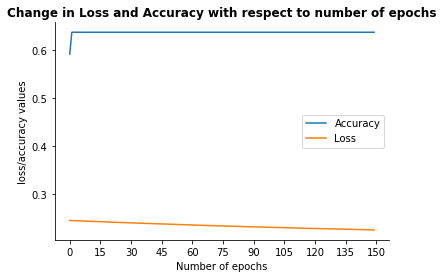

In [4]:
acc_onefifty = one_fifty_history .history['acc']
loss_onefifty= one_fifty_history .history['loss']
epoch = range(0,151)
ax = plt.subplot(111)
ax.plot(acc_onefifty, label="Accuracy")
plt.legend()
ax.plot(loss_onefifty, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,15))
plt.show()
# The plot shows the model has increase in accuracy from 0.6 to 0.63 
# and loss reduces from 0.24 to 0.22 during the training process for 150 epochs. 

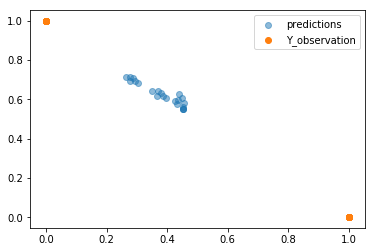

In [5]:
plt.scatter(predicted_targets[:,0],predicted_targets[:,1], label="predictions", alpha=0.5)
plt.scatter(Y[:,0],Y[:,1],label="Y_observation" )
plt.legend()
plt.show()
# the plot shows the points on (0,1) and (1,0) for Y_observations. 
# whereas in predictions the points of 1st variable(x-axis) is 
# plotted against 2nd variable(y-axis). I prefer to plot the 
# y_observations points over predicted points as in the next graph
# to view how the observed and predicted points are plotted near 
# to each other for better accuracy 

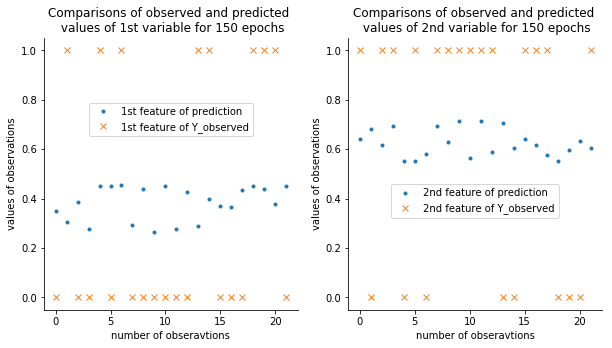

In [7]:
ax = plt.subplot(1,2,1)
ax.plot(predicted_targets[:,0], ".", label="1st feature of prediction")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.7))
ax.plot(Y[:,0], "x", label="1st feature of Y_observed")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.7))
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 1st variable for 150 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.plot(predicted_targets[:,1], ".", label="2nd feature of prediction")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.4))
ax.plot(Y[:,1], "x", label="2nd feature of Y_observed")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.4))
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 2nd variable for 150 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# In both the plots the predictions are far away from observation points, 
# This proves the accuracy of the model being only 63%

In [9]:
np.random.seed(7)

model = Sequential()
model.add(Dense(4, input_dim=5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# epcochs is changed from 150 to 500
fivehundred_history = model.fit(X, Y, epochs=500, batch_size=10, verbose=0)

# the loss of the model reduced from 0.22 of 150 epochs to 0.11 of 500 epochs
# the accuracy increased from 0.63 of 150 epochs to 0.90 of 500 epochs
scores = model.evaluate(X, Y)
print(scores)
 
predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

22/22 [==============================] - 0s 2ms/step
[0.11135309189558029, 0.9090909361839294]
Predicted:  [0.5089065  0.47718117] Observed:  [1. 0.]
Predicted:  [0.5089065  0.47718117] Observed:  [1. 0.]
Predicted:  [0.5089065  0.47718117] Observed:  [1. 0.]
Predicted:  [0.13329147 0.81317943] Observed:  [0. 1.]
Predicted:  [0.14862871 0.7969062 ] Observed:  [0. 1.]
Predicted:  [0.4812644 0.5000382] Observed:  [1. 0.]
Predicted:  [0.06379799 0.93352187] Observed:  [0. 1.]
Predicted:  [0.07620462 0.9210823 ] Observed:  [0. 1.]
Predicted:  [0.488054   0.49644276] Observed:  [1. 0.]
Predicted:  [0.05520483 0.94046706] Observed:  [0. 1.]
Predicted:  [0.13694209 0.8713488 ] Observed:  [0. 1.]
Predicted:  [0.40943563 0.55935466] Observed:  [0. 1.]
Predicted:  [0.13042478 0.8167159 ] Observed:  [0. 1.]
Predicted:  [0.0460467  0.95001686] Observed:  [0. 1.]
Predicted:  [0.5089065  0.47718117] Observed:  [1. 0.]
Predicted:  [0.12010049 0.827561  ] Observed:  [0. 1.]
Predicted:  [0.5089065  0.4

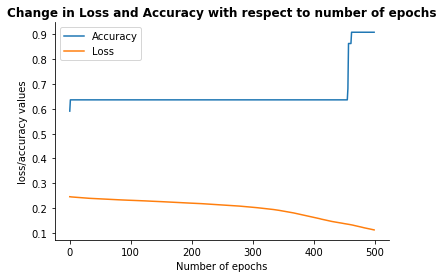

In [6]:
acc_five = fivehundred_history.history['acc']
loss_five= fivehundred_history.history['loss']
epoch = range(0,501)
ax = plt.subplot(111)
ax.plot(acc_five, label="Accuracy")
plt.legend()
ax.plot(loss_five, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,100))
plt.show()
# The plot shows the model has increase in accuracy from 0.6 to 0.90 
# and loss reduces from 0.24 to 0.11 during the training process of 500 epochs.  

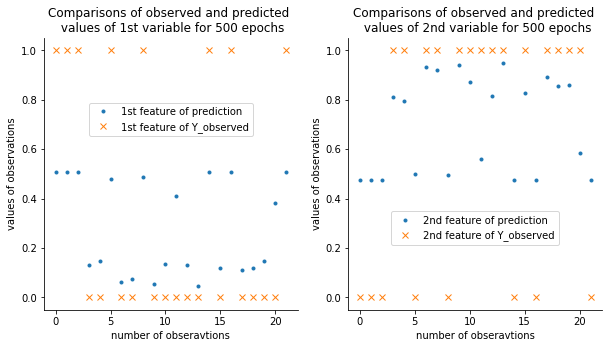

In [10]:
ax = plt.subplot(1,2,1)
ax.plot(predicted_targets[:,0], ".", label="1st feature of prediction")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.7))
ax.plot(Y[:,0], "x", label="1st feature of Y_observed")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.7))
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 1st variable for 500 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.plot(predicted_targets[:,1], ".", label="2nd feature of prediction")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.3))
ax.plot(Y[:,1], "x", label="2nd feature of Y_observed")
ax.legend(loc="center", bbox_to_anchor=(0.5,0.3))
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 2nd variable for 500 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction having value 0 are somewhat closer to observation with 
# value 0 for 1st variable
# The prediction having value 1 are somewhat closer to observation with 
# value 1 for 2nd variable

In [11]:
np.random.seed(7)

model = Sequential()
model.add(Dense(4, input_dim=5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# epcochs is changed from 500 to 1500
thousand_history = model.fit(X, Y, epochs=1500, batch_size=10, verbose=0)

# the loss of the model reduced from 0.13 of 500 epochs to 0.009 of 1500 epochs
# the accuracy increased from 0.90 of 500 epochs to 1.00 of 1500 epochs
scores = model.evaluate(X, Y)
print(scores)

predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

22/22 [==============================] - 0s 3ms/step
[0.00905798189342022, 1.0]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.00209191 0.9962851 ] Observed:  [0. 1.]
Predicted:  [0.00212948 0.99622333] Observed:  [0. 1.]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.00540384 0.99534094] Observed:  [0. 1.]
Predicted:  [0.00964979 0.9917006 ] Observed:  [0. 1.]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.00802094 0.9930988 ] Observed:  [0. 1.]
Predicted:  [0.01063217 0.99086565] Observed:  [0. 1.]
Predicted:  [0.02487724 0.96341914] Observed:  [0. 1.]
Predicted:  [0.00220477 0.9960996 ] Observed:  [0. 1.]
Predicted:  [0.00448844 0.9961282 ] Observed:  [0. 1.]
Predicted:  [0.8420845  0.15564504] Observed:  [1. 0.]
Predicted:  [0.00216588 0.9961635 ] Observed:  [0. 1.]
Predicted:  [0.8420845  0.15564504] Obse

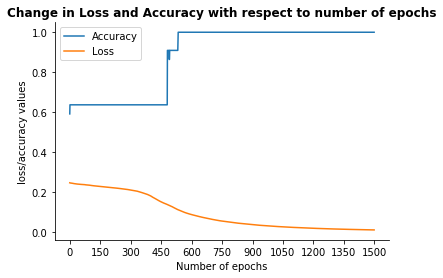

In [4]:
acc_thousand = thousand_history.history['acc']
loss_thousand= thousand_history.history['loss']
epoch = range(0,1501)
ax = plt.subplot(111)
ax.plot(acc_thousand, label="Accuracy")
plt.legend()
ax.plot(loss_thousand, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,150))
plt.show()
# The plot shows the model has increase in accuracy from 0.6 to 1 
# and loss reduces from 0.24 to 0.009 during the training process of 1500 epochs.  

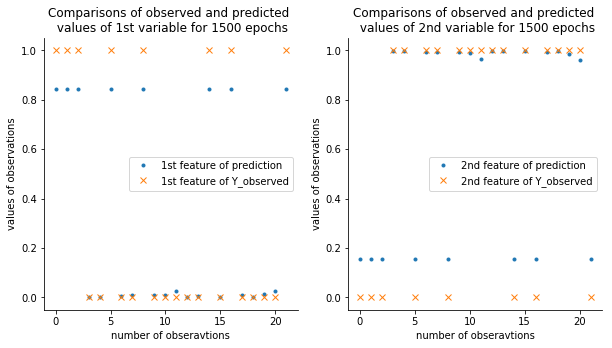

In [12]:
ax = plt.subplot(1,2,1)
ax.plot(predicted_targets[:,0], ".", label="1st feature of prediction")
ax.legend()
ax.plot(Y[:,0], "x", label="1st feature of Y_observed")
ax.legend()
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 1st variable for 1500 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.plot(predicted_targets[:,1], ".", label="2nd feature of prediction")
ax.legend()
ax.plot(Y[:,1], "x", label="2nd feature of Y_observed")
ax.legend()
plt.xlabel("number of obseravtions")
plt.ylabel("values of observations")
plt.title("Comparisons of observed and predicted \n values of 2nd variable for 1500 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction having value 0 are approximately equal to observation with 
# value 0 for 1st variable
# The prediction having value 1 are approximately equal to observation with 
# value 1 for 2nd variable